# 1. Tải dữ liệu

## 1.1. Import thư viện

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import graphviz


## 1.2.Tải và phân tích dữ liệu

In [5]:
# Tải dữ liệu White Wine từ file CSV
data = pd.read_csv("data/winequality-white.csv",sep=";")
# Hiển thị 5 dòng đầu tiên
print("Dữ liệu White Wine:")
print(data.head())

# Thông tin dữ liệu
print("\nThông tin dữ liệu:")
print(data.info())

# Kiểm tra phân phối nhãn 'quality'
print("\nPhân phối nhãn quality:")
print(data['quality'].value_counts())

Dữ liệu White Wine:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  


## 1.3. Nhóm chất lượng thành 3 nhóm: Low, Standard, High

In [6]:
# Nhóm các lớp chất lượng
def group_quality(value):
    if value <= 4:
        return 'Low'
    elif value <= 6:
        return 'Standard'
    else:
        return 'High'

# Thêm cột nhóm chất lượng
data['quality_grouped'] = data['quality'].apply(group_quality)

# Kiểm tra phân phối của các nhóm
print("\nPhân phối nhóm chất lượng:")
print(data['quality_grouped'].value_counts())



Phân phối nhóm chất lượng:
quality_grouped
Standard    3655
High        1060
Low          183
Name: count, dtype: int64


# 2.Các bước thực hiện

## 2.1.Chuẩn bị dữ liệu

### 2.1.1.Tác đặc trưng và nhãn (X và y)

In [7]:
# Tách đặc trưng (X) và nhãn (y)
X = data.drop(['quality', 'quality_grouped'], axis=1)
y = data['quality_grouped']


### 2.1.2 Phân tích dữ liệu gốc

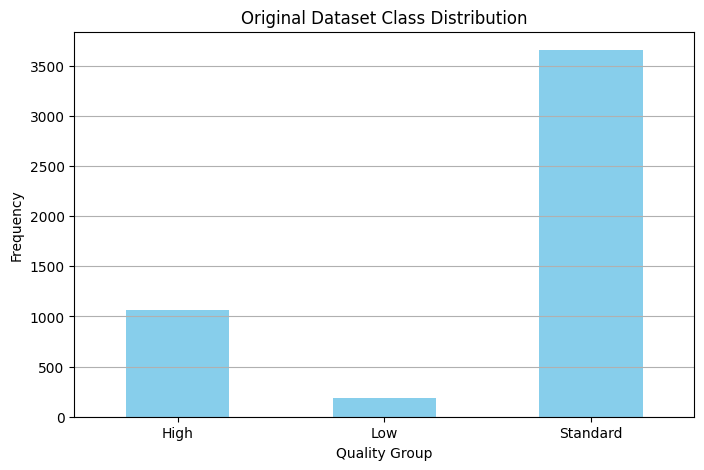

In [8]:
import matplotlib.pyplot as plt

# Hàm vẽ biểu đồ phân phối lớp
def plot_class_distribution(data, title):
    plt.figure(figsize=(8, 5))
    data.value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Quality Group')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

# Vẽ biểu đồ cho tập dữ liệu gốc
plot_class_distribution(y, "Original Dataset Class Distribution")

### 2.1.3.Phân chia dữ liệu train/test với các tỉ lệ khác nhau

In [9]:
from sklearn.model_selection import train_test_split

# Các tỷ lệ (train_size, test_size)
splits = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
datasets = {}

for train_size, test_size in splits:
    # Chia dữ liệu theo tỷ lệ
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        train_size=train_size, 
        test_size=test_size, 
        stratify=y, 
        random_state=42
    )
    datasets[(train_size, test_size)] = (X_train, X_test, y_train, y_test)
    
    # Hiển thị thông tin
    print(f"Tỉ lệ {int(train_size*100)}/{int(test_size*100)}:")
    print(f"  Số lượng mẫu huấn luyện: {len(y_train)}")
    print(f"  Số lượng mẫu kiểm tra: {len(y_test)}")



Tỉ lệ 40/60:
  Số lượng mẫu huấn luyện: 1959
  Số lượng mẫu kiểm tra: 2939
Tỉ lệ 60/40:
  Số lượng mẫu huấn luyện: 2938
  Số lượng mẫu kiểm tra: 1960
Tỉ lệ 80/20:
  Số lượng mẫu huấn luyện: 3918
  Số lượng mẫu kiểm tra: 980
Tỉ lệ 90/10:
  Số lượng mẫu huấn luyện: 4408
  Số lượng mẫu kiểm tra: 490


### 2.1.4.Biểu đồ thể hiện các tỉ lệ train/test

Phân phối dữ liệu với tỉ lệ 40/60 (Train/Test):


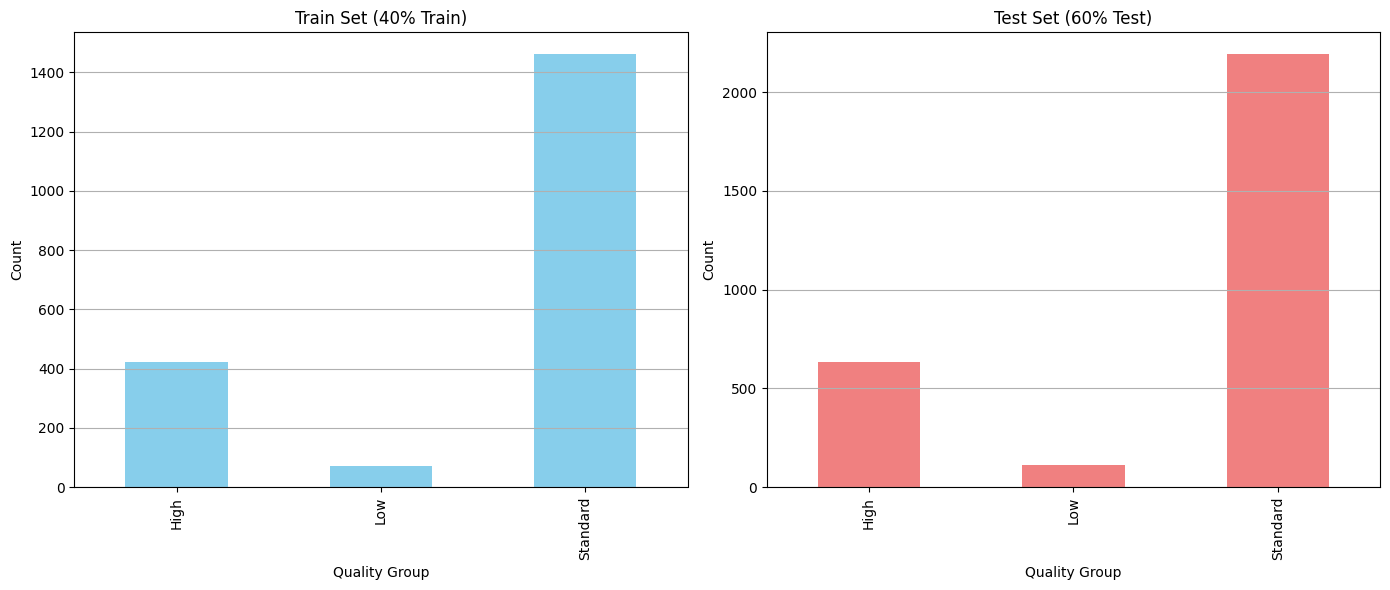

Phân phối dữ liệu với tỉ lệ 60/40 (Train/Test):


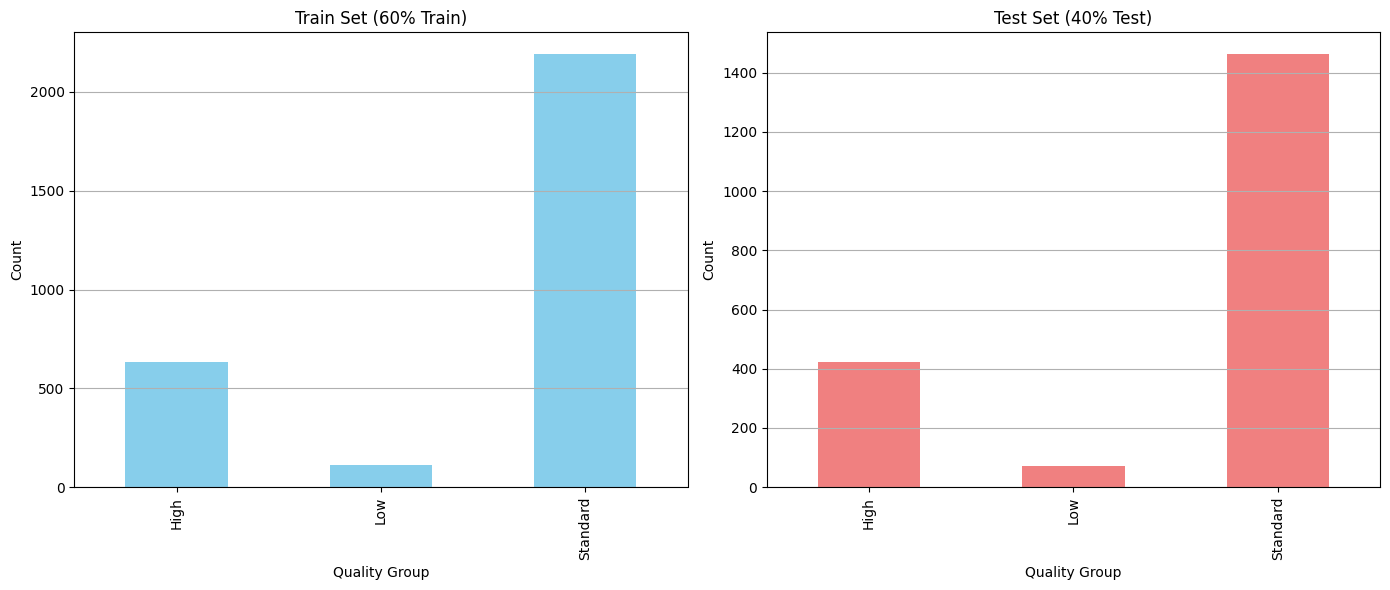

Phân phối dữ liệu với tỉ lệ 80/20 (Train/Test):


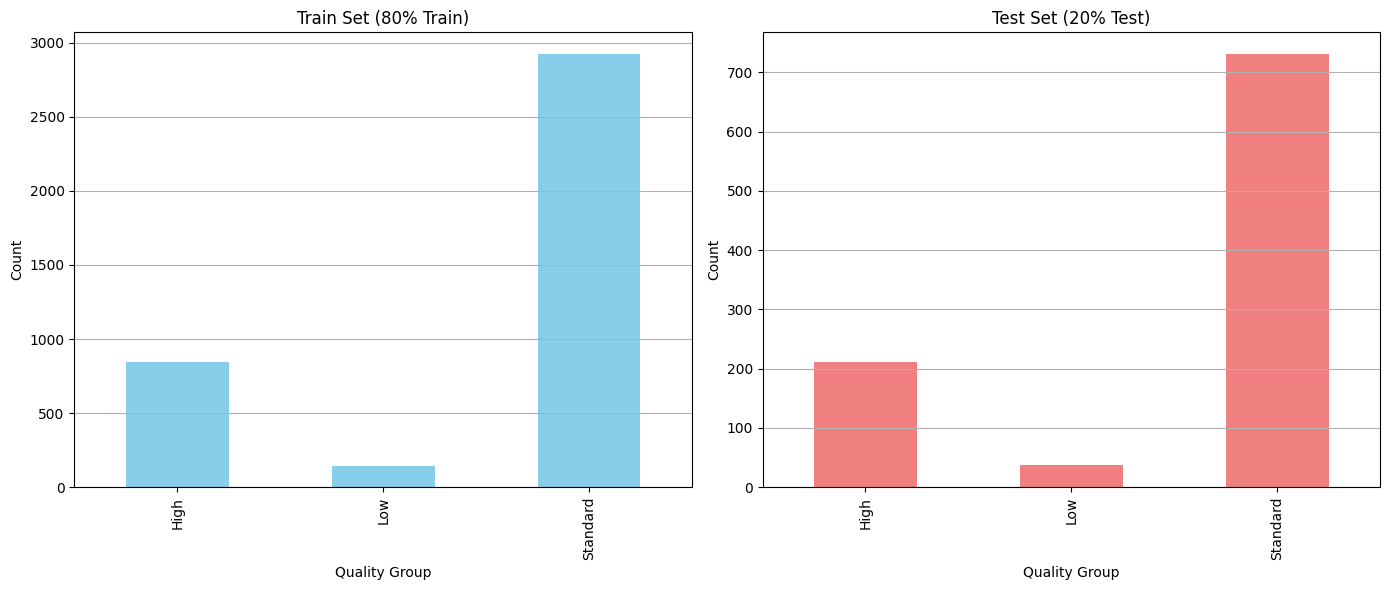

Phân phối dữ liệu với tỉ lệ 90/10 (Train/Test):


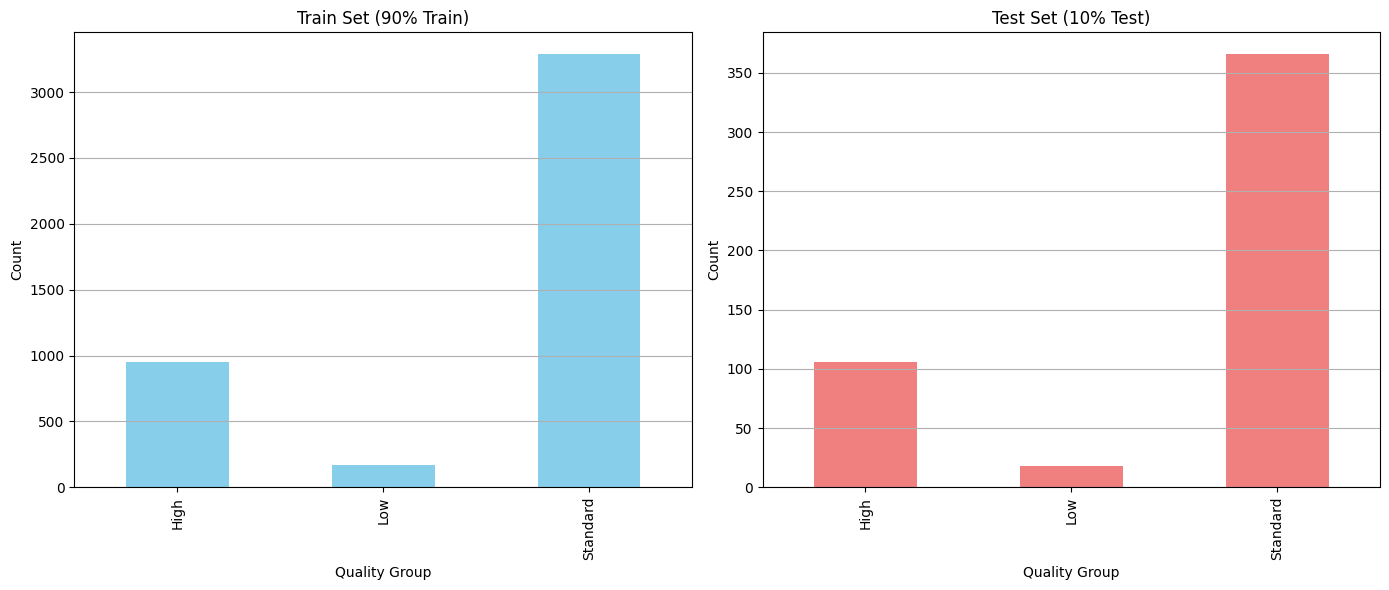

In [10]:
import matplotlib.pyplot as plt

# Hàm vẽ biểu đồ phân phối lớp
def plot_class_distribution_together(y_train, y_test, train_title, test_title):
    """
    Vẽ biểu đồ phân phối lớp cho tập huấn luyện và kiểm tra trên cùng một hình.
    
    Args:
        y_train: Dữ liệu nhãn của tập huấn luyện.
        y_test: Dữ liệu nhãn của tập kiểm tra.
        train_title: Tiêu đề cho biểu đồ tập huấn luyện.
        test_title: Tiêu đề cho biểu đồ tập kiểm tra.
    """
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Tạo hai biểu đồ cạnh nhau
    
    # Biểu đồ tập huấn luyện
    y_train.value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax[0])
    ax[0].set_title(train_title)
    ax[0].set_xlabel('Quality Group')
    ax[0].set_ylabel('Count')
    ax[0].grid(axis='y')
    
    # Biểu đồ tập kiểm tra
    y_test.value_counts().sort_index().plot(kind='bar', color='lightcoral', ax=ax[1])
    ax[1].set_title(test_title)
    ax[1].set_xlabel('Quality Group')
    ax[1].set_ylabel('Count')
    ax[1].grid(axis='y')
    
    # Tối ưu hóa hiển thị
    plt.tight_layout()
    plt.show()

# Vẽ đồ thị phân phối lớp cho từng tập dữ liệu
for train_size, test_size in splits:
    # Lấy y_train và y_test từ datasets
    _, _, y_train, y_test = datasets[(train_size, test_size)]
    
    print(f"Phân phối dữ liệu với tỉ lệ {int(train_size*100)}/{int(test_size*100)} (Train/Test):")
    
    # Vẽ biểu đồ tập huấn luyện và kiểm tra trên cùng một hình
    plot_class_distribution_together(
        y_train, y_test, 
        f"Train Set ({int(train_size*100)}% Train)", 
        f"Test Set ({int(test_size*100)}% Test)"
    )


## 2.2.Xây Dựng Các Bộ Phân Loại Cây Quyết Định

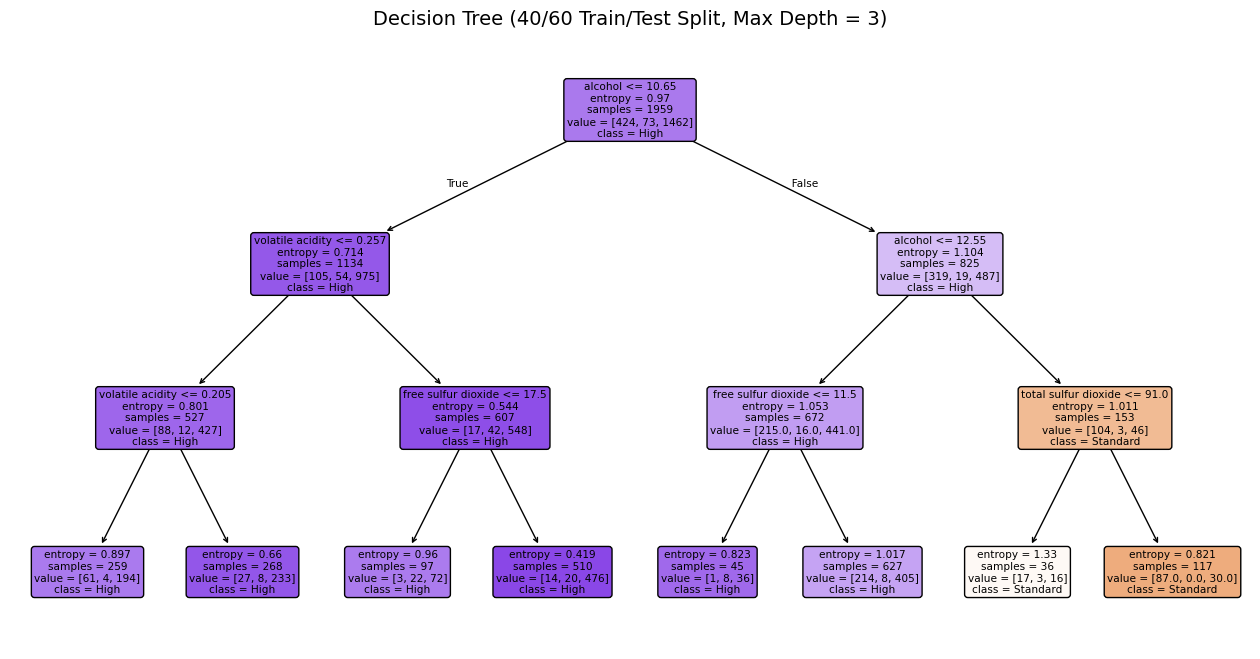

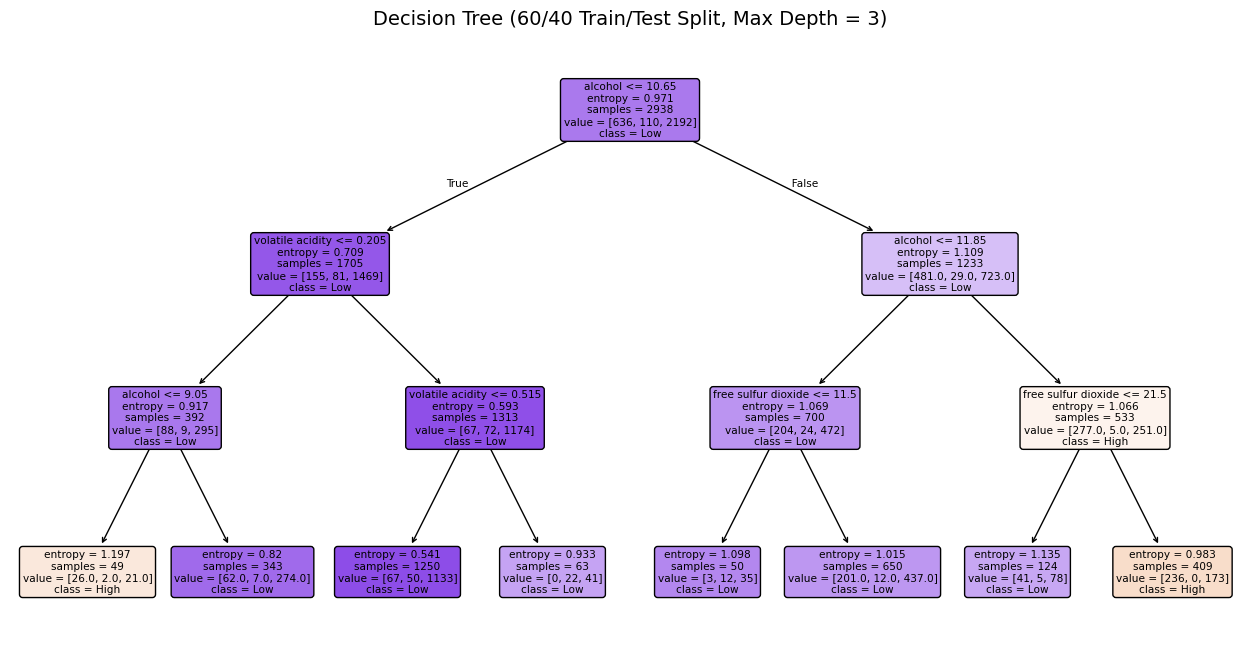

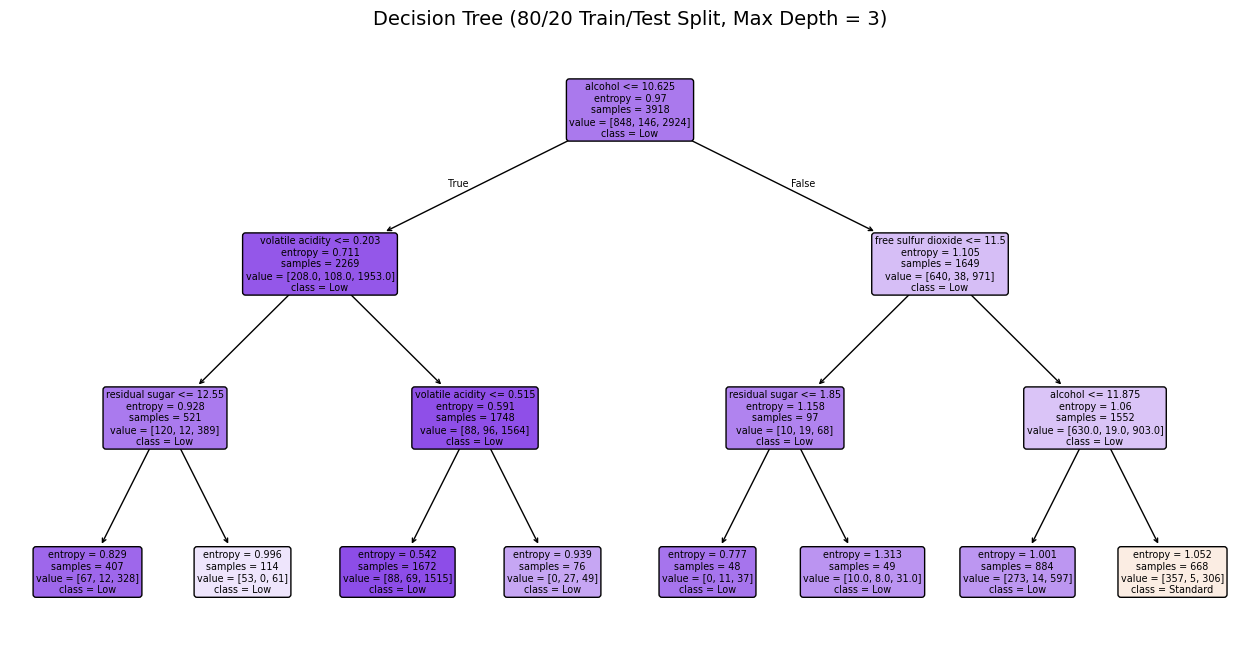

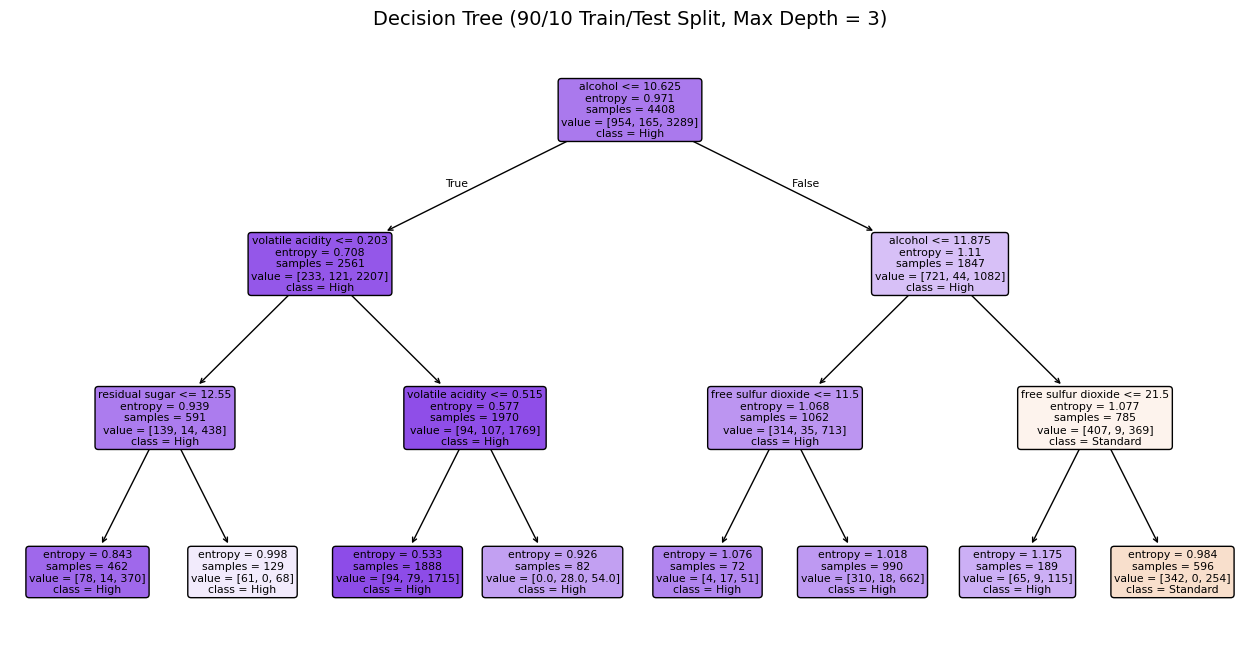

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Hàm xây dựng và trực quan hóa cây quyết định
def build_and_visualize_tree_separately(X_train, y_train, train_size, test_size, max_depth=3):
    """
    Xây dựng và trực quan hóa cây quyết định cho một tỷ lệ cụ thể trên hình riêng biệt.
    
    Args:
        X_train: Dữ liệu đặc trưng của tập huấn luyện.
        y_train: Dữ liệu nhãn của tập huấn luyện.
        train_size: Tỷ lệ tập huấn luyện.
        test_size: Tỷ lệ tập kiểm tra.
        max_depth: Độ sâu tối đa của cây quyết định.
    """
    # Khởi tạo và huấn luyện Decision Tree
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    
    # Vẽ cây quyết định trên một hình riêng biệt
    plt.figure(figsize=(16, 8))
    plot_tree(
        clf, 
        feature_names=X.columns, 
        class_names=y_train.unique(), 
        filled=True, 
        rounded=True
    )
    plt.title(f"Decision Tree ({int(train_size*100)}/{int(test_size*100)} Train/Test Split, Max Depth = {max_depth})", fontsize=14)
    plt.show()

# Vẽ bốn cây quyết định riêng biệt
split_ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
for train_size, test_size in split_ratios:
    # Lấy dữ liệu tương ứng với tỷ lệ hiện tại
    X_train, X_test, y_train, y_test = datasets[(train_size, test_size)]
    
    # Gọi hàm để vẽ cây quyết định
    build_and_visualize_tree_separately(X_train, y_train, train_size, test_size, max_depth=3)



## 2.3.Đánh Giá Các Bộ Phân Loại Cây Quyết Định


Evaluating Decision Tree for split 40/60:
Classification Report:
              precision    recall  f1-score   support

        High       0.58      0.19      0.28       636
         Low       0.00      0.00      0.00       110
    Standard       0.77      0.96      0.86      2193

    accuracy                           0.76      2939
   macro avg       0.45      0.38      0.38      2939
weighted avg       0.70      0.76      0.70      2939

Confusion Matrix:
[[ 118    0  518]
 [   2    0  108]
 [  82    0 2111]]


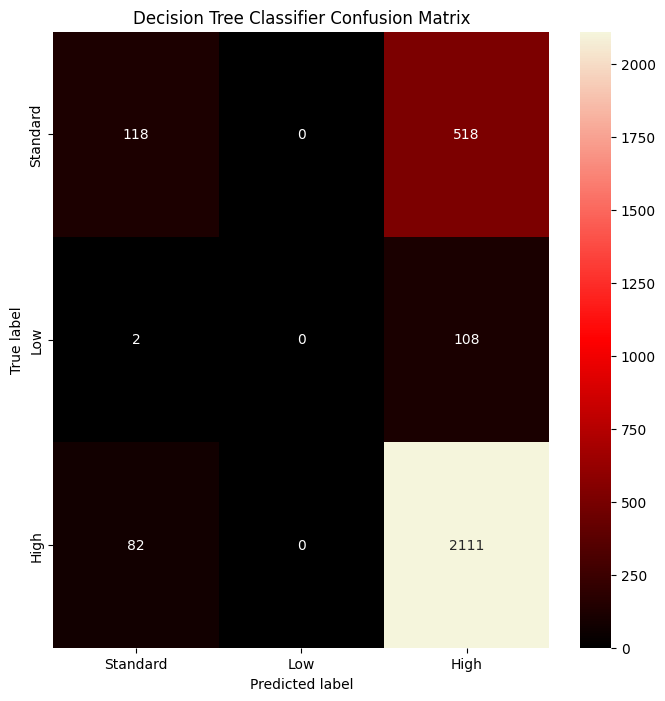


Evaluating Decision Tree for split 60/40:
Classification Report:
              precision    recall  f1-score   support

        High       0.56      0.38      0.45       424
         Low       0.00      0.00      0.00        73
    Standard       0.80      0.91      0.85      1463

    accuracy                           0.76      1960
   macro avg       0.45      0.43      0.43      1960
weighted avg       0.72      0.76      0.73      1960

Confusion Matrix:
[[ 160    0  264]
 [   0    0   73]
 [ 125    0 1338]]


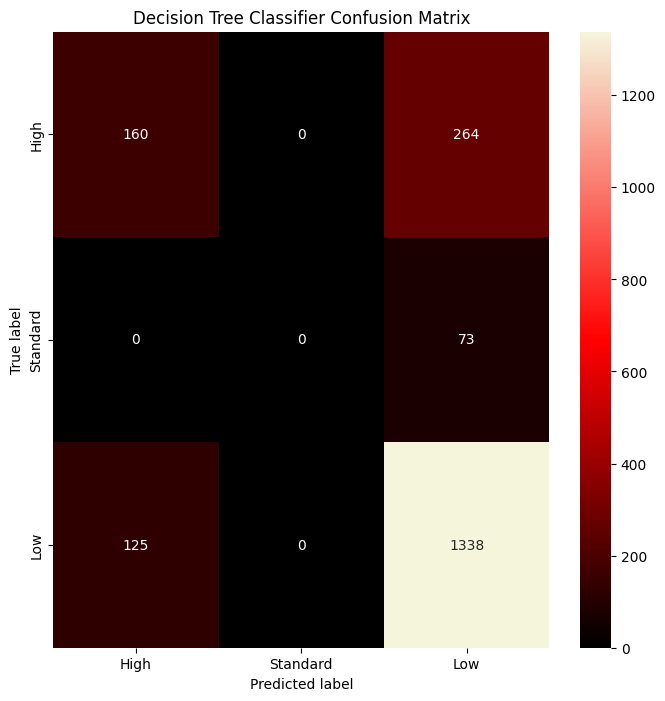


Evaluating Decision Tree for split 80/20:
Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.39      0.45       212
         Low       0.00      0.00      0.00        37
    Standard       0.80      0.91      0.85       731

    accuracy                           0.76       980
   macro avg       0.45      0.43      0.43       980
weighted avg       0.72      0.76      0.73       980

Confusion Matrix:
[[ 82   0 130]
 [  0   0  37]
 [ 67   0 664]]


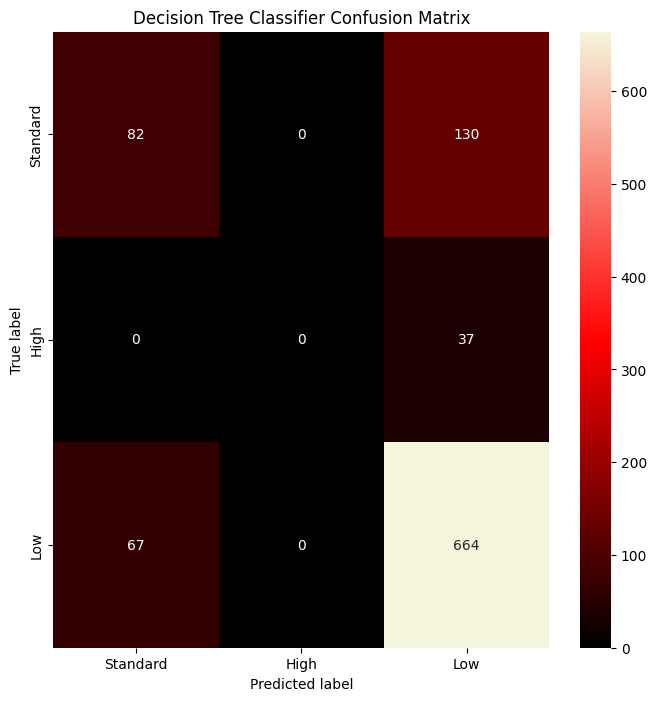


Evaluating Decision Tree for split 90/10:
Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.28      0.37       106
         Low       0.00      0.00      0.00        18
    Standard       0.78      0.93      0.85       366

    accuracy                           0.76       490
   macro avg       0.44      0.40      0.41       490
weighted avg       0.70      0.76      0.72       490

Confusion Matrix:
[[ 30   0  76]
 [  0   0  18]
 [ 25   0 341]]


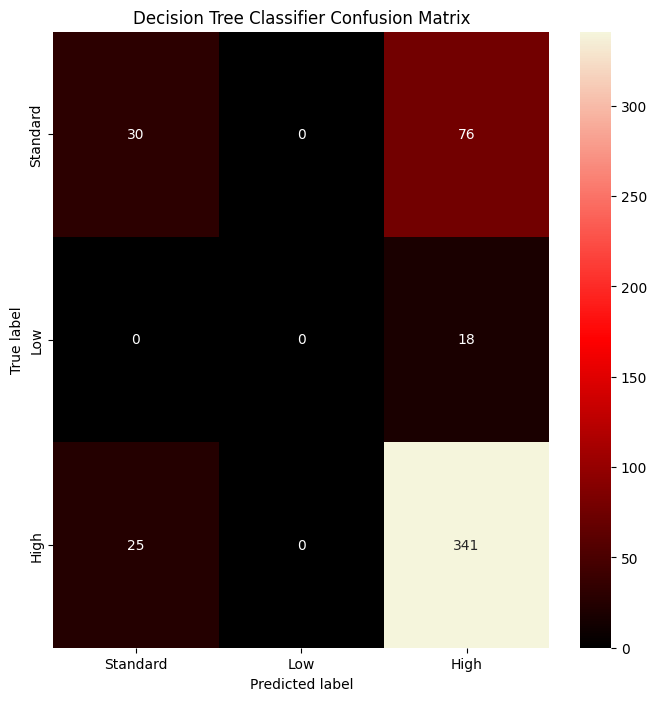

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Hàm đánh giá hiệu suất mô hình
def evaluate_model(clf, X_test, y_test, class_names):
    """
    Đánh giá mô hình bằng classification report và confusion matrix.

    Args:
        clf: Mô hình đã huấn luyện.
        X_test: Dữ liệu kiểm tra (đặc trưng).
        y_test: Nhãn kiểm tra.
        class_names: Tên các lớp.
    """
    # Dự đoán
    y_pred = clf.predict(X_test)

    # Báo cáo phân loại
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0)) 

    # Ma trận nhầm lẫn
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Trực quan hóa ma trận nhầm lẫn
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [(0, "black"), (0.5, "red"), (1, "beige")])
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Decision Tree Classifier Confusion Matrix')
    plt.show()

# Đánh giá Decision Tree trên tất cả các tỷ lệ
split_ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
for train_size, test_size in split_ratios:
    print(f"\nEvaluating Decision Tree for split {int(train_size*100)}/{int(test_size*100)}:")

    # Lấy dữ liệu
    X_train, X_test, y_train, y_test = datasets[(train_size, test_size)]

    # Huấn luyện mô hình
    clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)  # Sử dụng max_depth=3
    clf.fit(X_train, y_train)

    # Đánh giá mô hình
    evaluate_model(clf, X_test, y_test, class_names=y_train.unique())


## 2.4.Độ Sâu và Độ Chính Xác của Cây Quyết Định (80/20)

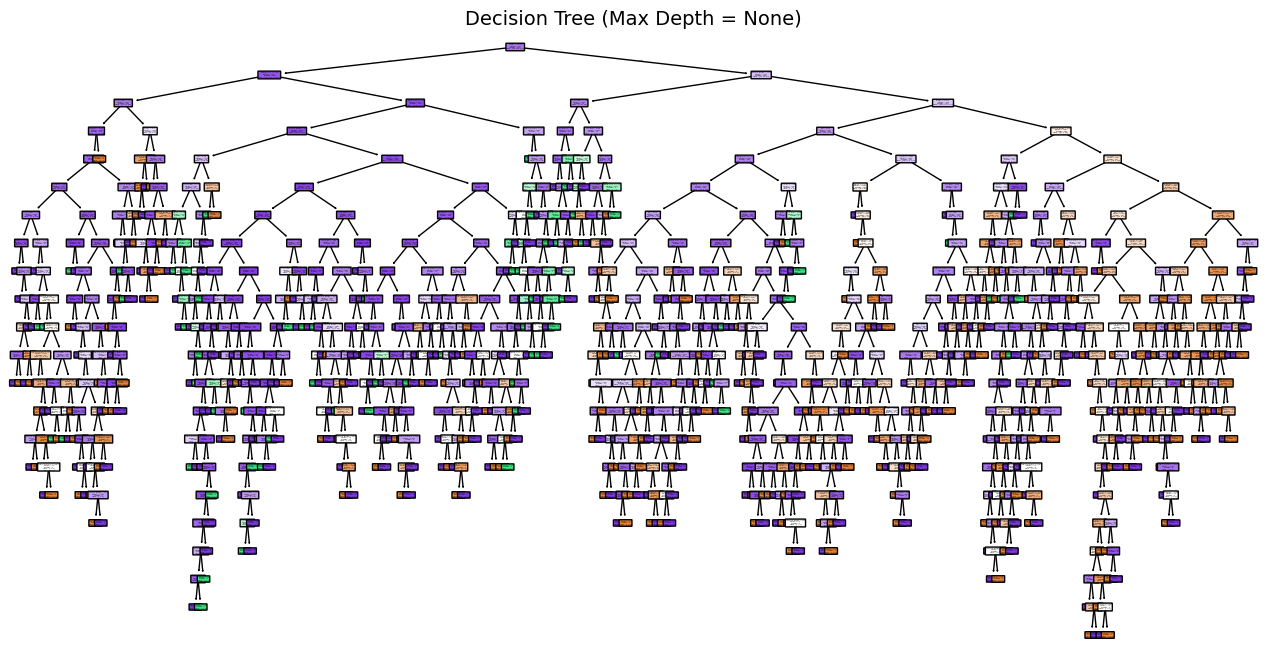

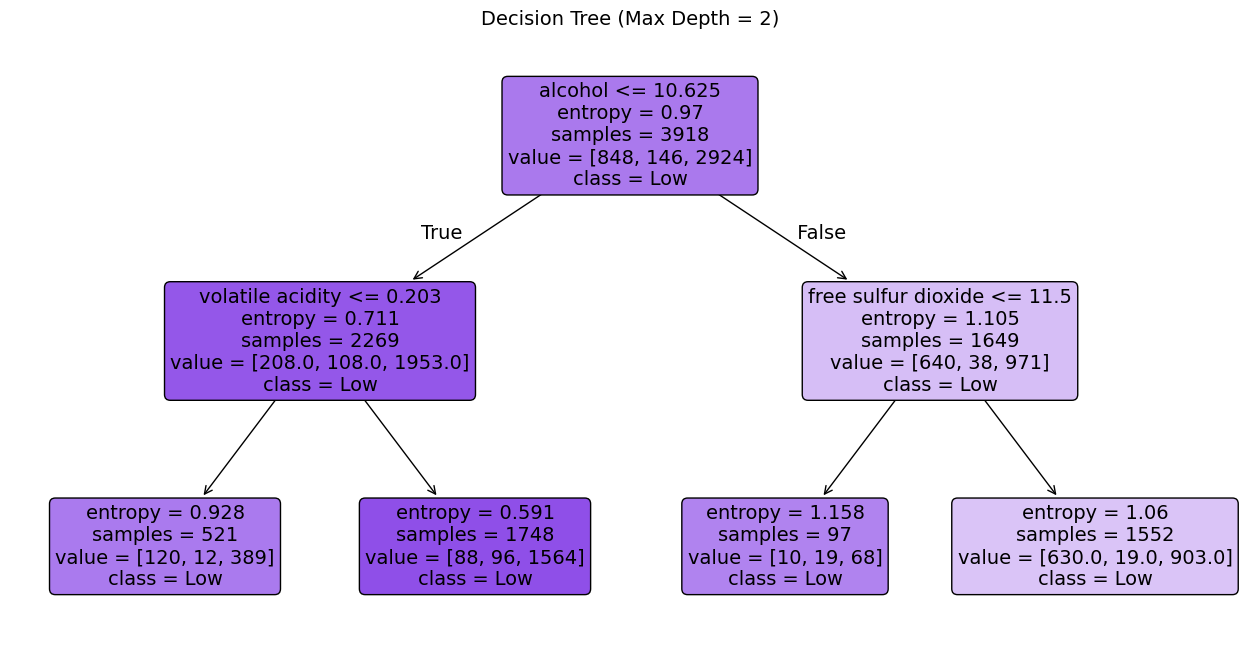

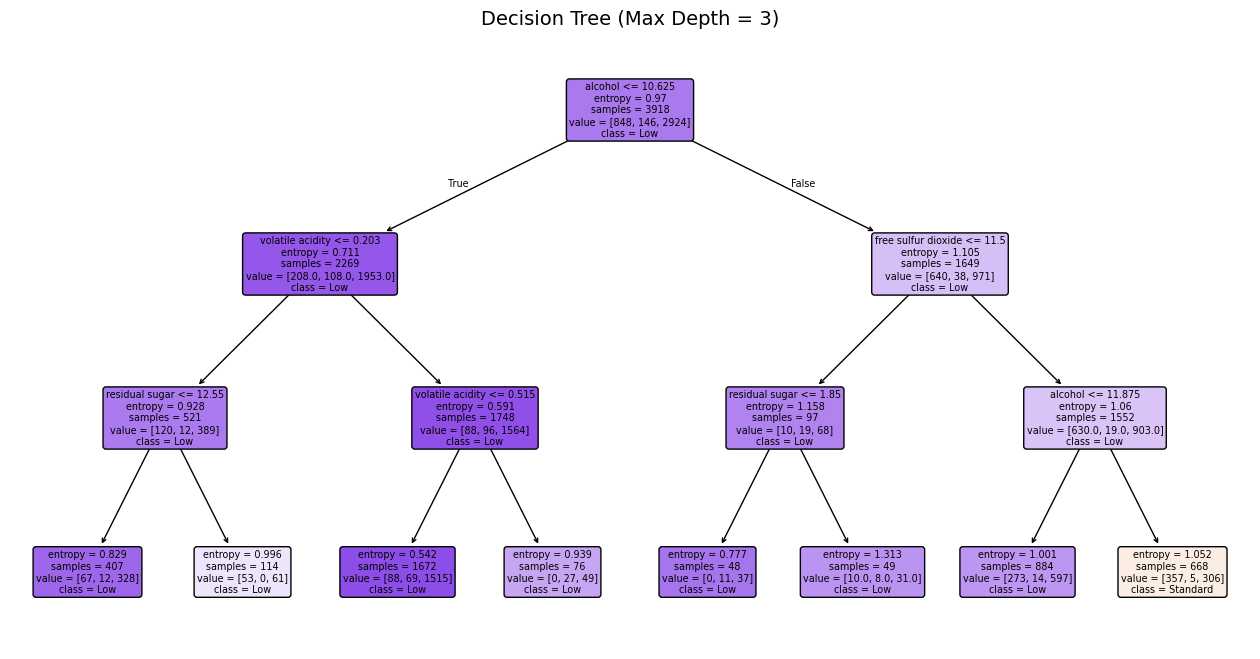

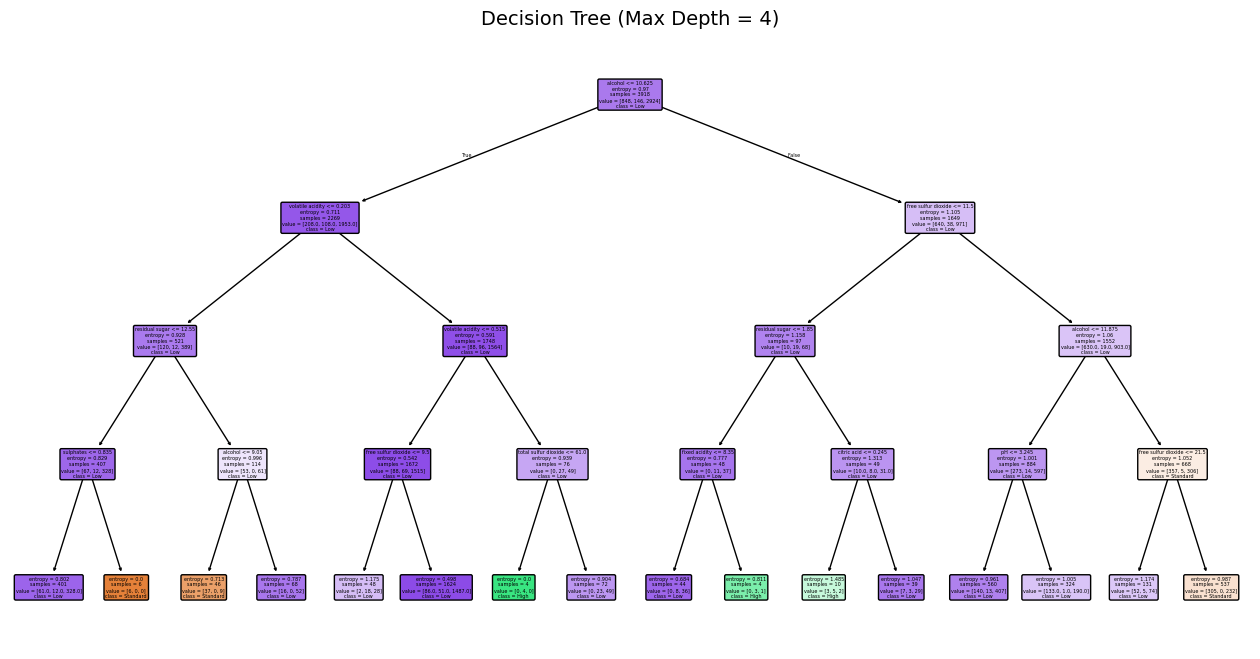

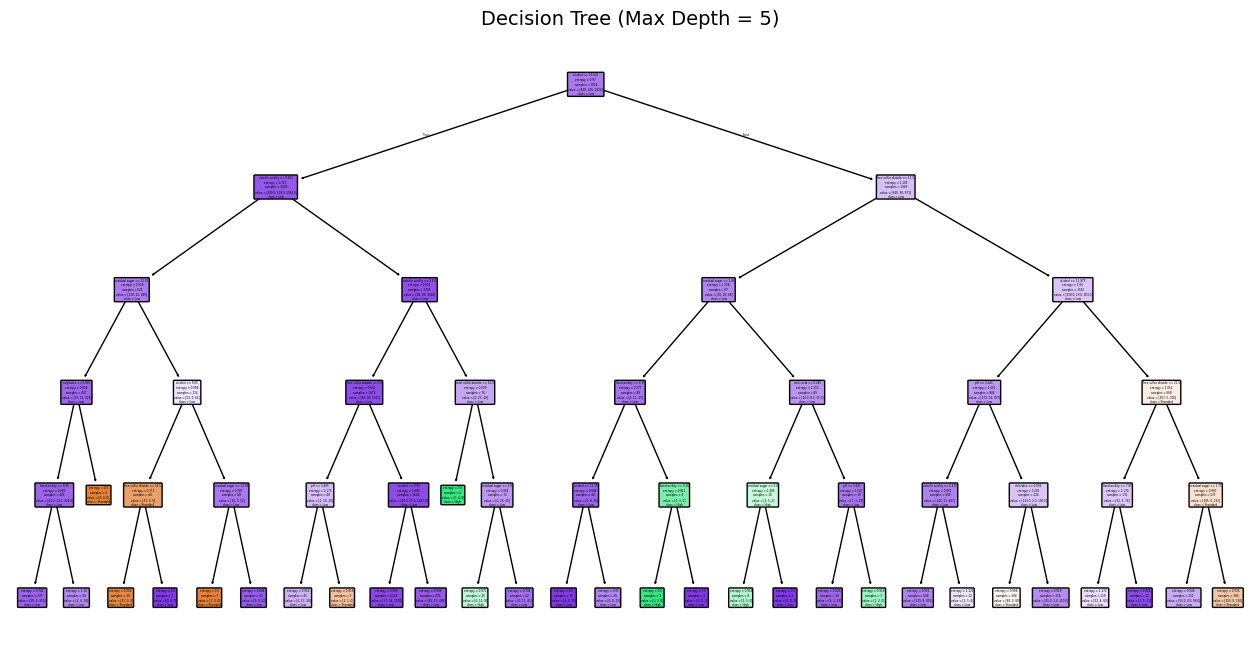

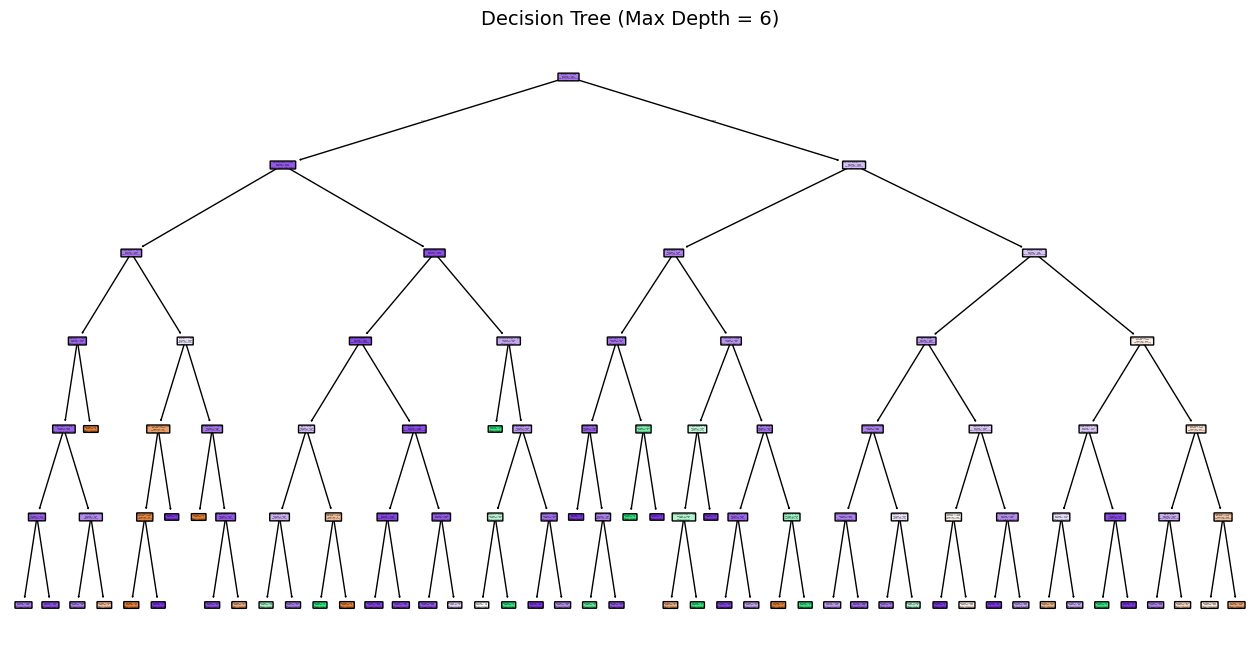

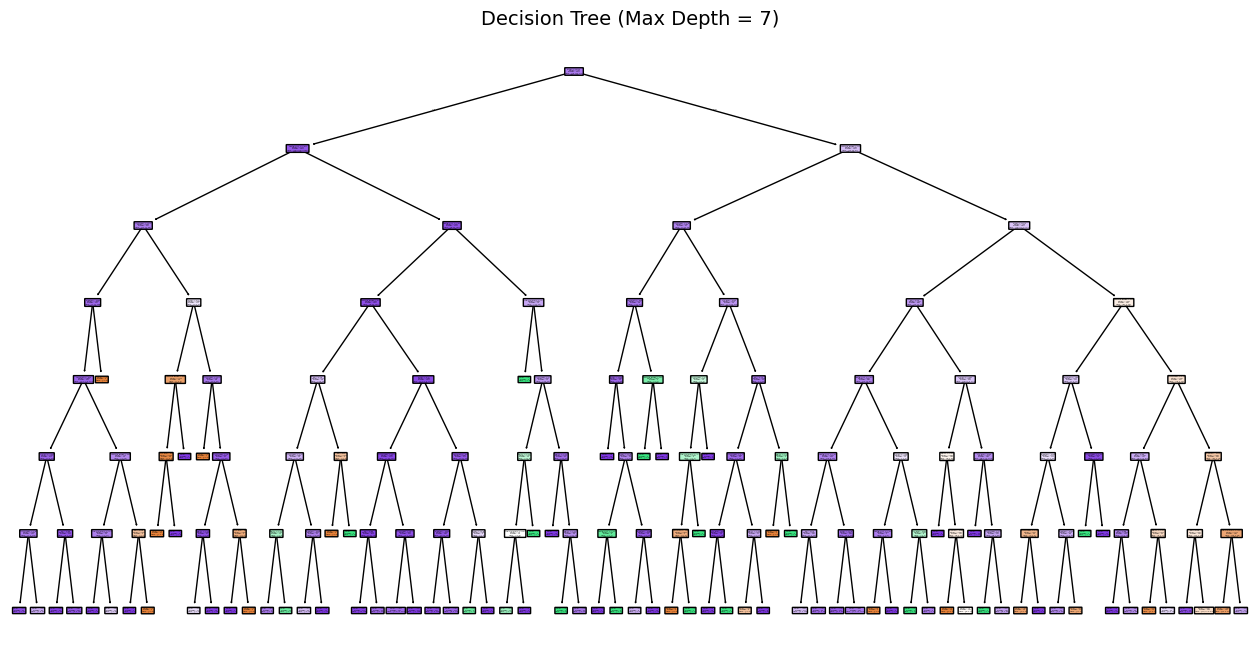

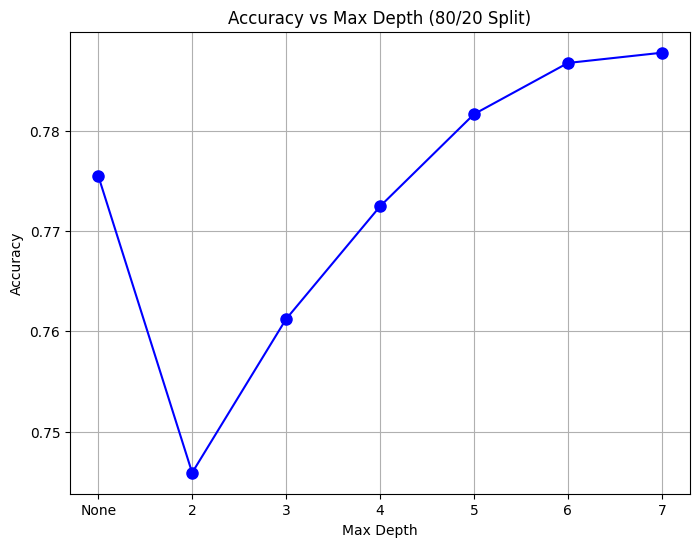


Accuracy for different max_depth values (Horizontal Format):
             None         2         3         4         5         6         7
Accuracy  0.77551  0.745918  0.761224  0.772449  0.781633  0.786735  0.787755


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Tập dữ liệu với tỷ lệ 80/20
train_size, test_size = (0.8, 0.2)
X_train, X_test, y_train, y_test = datasets[(train_size, test_size)]

# Danh sách các giá trị max_depth
depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

# Duyệt qua từng giá trị max_depth
for max_depth in depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Trực quan hóa Decision Tree với từng max_depth
    plt.figure(figsize=(16, 8))
    from sklearn.tree import plot_tree
    plot_tree(clf, feature_names=X.columns, class_names=y_train.unique(), filled=True, rounded=True)
    title_depth = "None" if max_depth is None else max_depth
    plt.title(f"Decision Tree (Max Depth = {title_depth})", fontsize=14)
    plt.show()

# Chuyển None thành "None" trong phần hiển thị trục x
x_labels = ['None' if d is None else str(d) for d in depths]

# Biểu đồ Accuracy vs Max Depth
plt.figure(figsize=(8, 6))
plt.plot(x_labels, accuracies, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Accuracy vs Max Depth (80/20 Split)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(x_labels)
plt.grid(True)
plt.show()

# Tạo bảng kết quả với giá trị nằm ngang
accuracy_df_horizontal = pd.DataFrame([accuracies], columns=x_labels)
accuracy_df_horizontal.index = ['Accuracy']

# In bảng kết quả theo chiều ngang
print("\nAccuracy for different max_depth values (Horizontal Format):")
print(accuracy_df_horizontal.to_string(index=True, header=True))



# 3.Tóm tắt kết quả

In [14]:
results = {
    "Number of Classes": [y.nunique()],
    "Number of Features": [X.shape[1]],
    "Sample Size": [X.shape[0]],
    "Accuracy": [accuracy]
}

results_df = pd.DataFrame(results)
print("Dataset Summary:")
print(results_df)

Dataset Summary:
   Number of Classes  Number of Features  Sample Size  Accuracy
0                  3                  11         4898  0.787755
